## Imports

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [8]:
DATASET_DIR = '../../Dataset/body_level_classification_train.csv'
df = pd.read_csv(DATASET_DIR)

## Data Preprocessing

In [9]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [10]:

df['Gender'] = pd.factorize(df['Gender'])[0]
df['H_Cal_Consump'] = pd.factorize(df['H_Cal_Consump'])[0]
df['Alcohol_Consump'] = pd.factorize(df['Alcohol_Consump'])[0]
df['Smoking'] = pd.factorize(df['Smoking'])[0]
df['Food_Between_Meals'] = pd.factorize(df['Food_Between_Meals'])[0]
df['Fam_Hist'] = pd.factorize(df['Fam_Hist'])[0]
df['H_Cal_Burn'] = pd.factorize(df['H_Cal_Burn'])[0]
df['Transport'] = pd.factorize(df['Transport'])[0]


In [11]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,0,2.663421,1.041110,0,0,3.000000,0,0,0,0.794402,1.391948,0,Body Level 1
1,1,19.799054,1.743702,54.927529,0,2.000000,2.847264,1,0,3.289260,1,0,0,1.680844,2.000000,0,Body Level 1
2,0,17.823438,1.708406,50.000000,0,1.642241,1.099231,1,0,3.452590,1,1,0,0.418875,1.000000,0,Body Level 1
3,0,19.007177,1.690727,49.895716,0,1.212908,1.029703,1,0,3.207071,1,1,0,2.000000,1.000000,0,Body Level 1
4,1,19.729250,1.793315,58.195150,0,2.508835,2.076933,0,0,3.435905,1,0,0,2.026668,1.443328,1,Body Level 1


## Feature Extraction

In [15]:
y = df['Body_Level']
X = df.drop(['Body_Level'], axis=1)
print(X.shape)
print(y.shape)

(1477, 16)
(1477,)


## Data Splitting

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1181, 16)
(1181,)
(296, 16)
(296,)


## Model Training

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

Accuracy:  0.7702702702702703


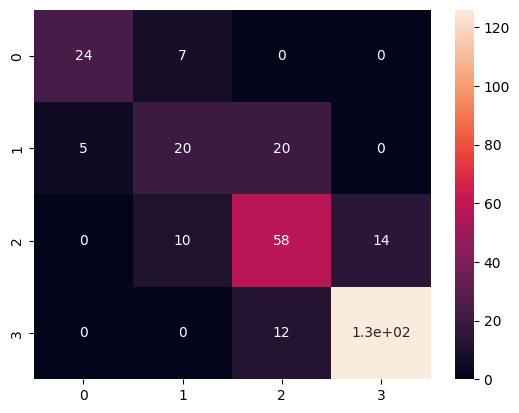

              precision    recall  f1-score   support

Body Level 1       0.83      0.77      0.80        31
Body Level 2       0.54      0.44      0.49        45
Body Level 3       0.64      0.71      0.67        82
Body Level 4       0.90      0.91      0.91       138

    accuracy                           0.77       296
   macro avg       0.73      0.71      0.72       296
weighted avg       0.77      0.77      0.77       296

F1 Score:  0.767388750923806


In [22]:
y_pred = model.predict(x_test)

# Accuracy Score
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# weighted F1-score
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))